In [3]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [4]:
data_path = "../robomimic/datasets/tool_hang/ph/low_dim_v15.hdf5"

f = h5py.File(data_path, "r")

In [5]:
data = f["data"]

In [6]:
data.keys()

<KeysViewHDF5 ['demo_0', 'demo_1', 'demo_10', 'demo_100', 'demo_101', 'demo_102', 'demo_103', 'demo_104', 'demo_105', 'demo_106', 'demo_107', 'demo_108', 'demo_109', 'demo_11', 'demo_110', 'demo_111', 'demo_112', 'demo_113', 'demo_114', 'demo_115', 'demo_116', 'demo_117', 'demo_118', 'demo_119', 'demo_12', 'demo_120', 'demo_121', 'demo_122', 'demo_123', 'demo_124', 'demo_125', 'demo_126', 'demo_127', 'demo_128', 'demo_129', 'demo_13', 'demo_130', 'demo_131', 'demo_132', 'demo_133', 'demo_134', 'demo_135', 'demo_136', 'demo_137', 'demo_138', 'demo_139', 'demo_14', 'demo_140', 'demo_141', 'demo_142', 'demo_143', 'demo_144', 'demo_145', 'demo_146', 'demo_147', 'demo_148', 'demo_149', 'demo_15', 'demo_150', 'demo_151', 'demo_152', 'demo_153', 'demo_154', 'demo_155', 'demo_156', 'demo_157', 'demo_158', 'demo_159', 'demo_16', 'demo_160', 'demo_161', 'demo_162', 'demo_163', 'demo_164', 'demo_165', 'demo_166', 'demo_167', 'demo_168', 'demo_169', 'demo_17', 'demo_170', 'demo_171', 'demo_172', '

In [7]:
demo = data["demo_0"]

In [8]:
for i in data.attrs:
    print(i, data.attrs[i])

env_args {
    "env_name": "ToolHang",
    "env_version": "1.5.1",
    "type": 1,
    "env_kwargs": {
        "has_renderer": false,
        "has_offscreen_renderer": false,
        "ignore_done": true,
        "use_object_obs": true,
        "use_camera_obs": false,
        "control_freq": 20,
        "controller_configs": {
            "type": "BASIC",
            "body_parts": {
                "right": {
                    "type": "OSC_POSE",
                    "input_max": 1,
                    "input_min": -1,
                    "output_max": [
                        0.05,
                        0.05,
                        0.05,
                        0.5,
                        0.5,
                        0.5
                    ],
                    "output_min": [
                        -0.05,
                        -0.05,
                        -0.05,
                        -0.5,
                        -0.5,
                        -0.5
                    ],

In [9]:
demo.keys()

<KeysViewHDF5 ['actions', 'dones', 'next_obs', 'obs', 'rewards', 'states']>

In [10]:
pos = demo["obs"]["robot0_eef_pos"][:]

In [11]:
demo_states = demo["states"][:]

In [12]:
trajectories = []

for demo_name in data.keys():

    demo = data[demo_name]

    traj = demo["obs"]["robot0_eef_pos"][:]
    trajectories.append(traj)

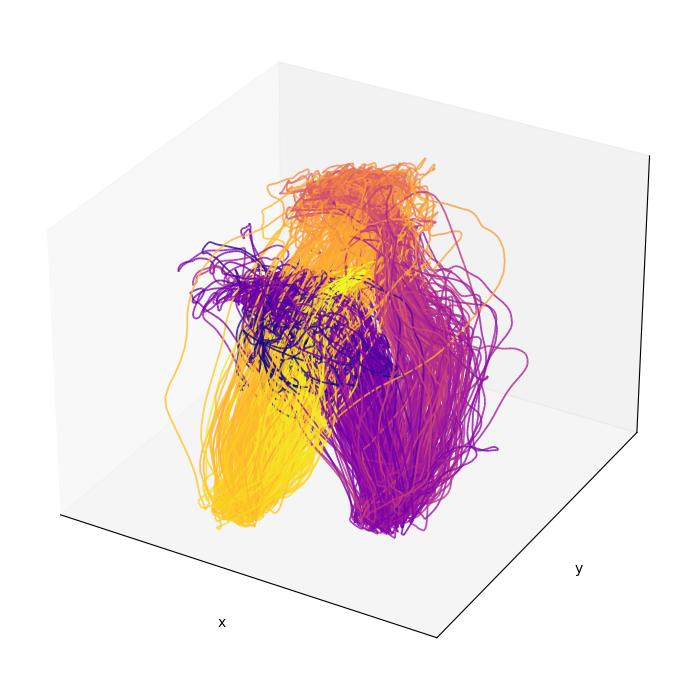

In [26]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import numpy as np

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

for i, traj in enumerate(trajectories):
    points = traj
    segments = np.stack([points[:-1], points[1:]], axis=1)
    norm = Normalize(vmin=0, vmax=len(points) - 1)
    colors = cm.plasma_r(norm(np.arange(len(points) - 1)))
    lc = Line3DCollection(segments, colors=colors, linewidth=1.3, alpha=0.8)
    ax.add_collection3d(lc)
    ax.scatter(*points[0], c=colors[0].reshape(1, -1), s=30, marker='o')
    ax.scatter(*points[-1], c=colors[-1].reshape(1, -1), s=30, marker='^')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=30, azim=-60)

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

plt.tight_layout()

plt.savefig("robot_tool_hang_coverage.png", dpi=300)

plt.show()



Загружено 681 тактов


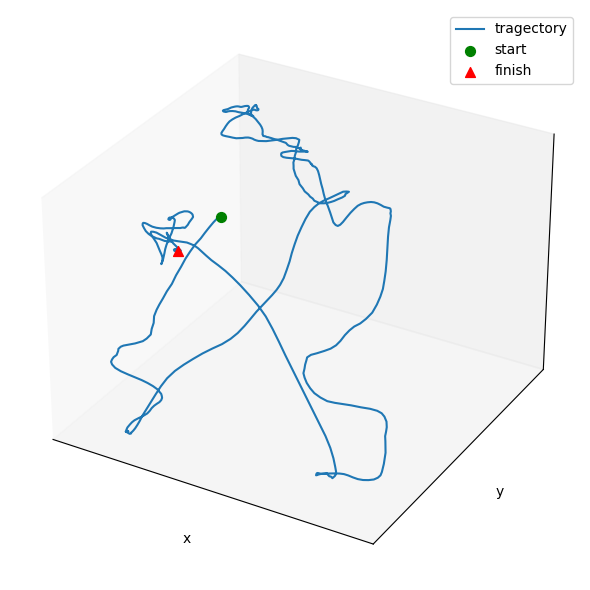

In [27]:
T = pos.shape[0]
print(f"Загружено {T} тактов")

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot(pos[:, 0], pos[:, 1], pos[:, 2],
        lw=1.5, label='tragectory')

ax.scatter(*pos[0],  c='green', s=50, marker='o', label='start')
ax.scatter(*pos[-1], c='red',   s=50, marker='^', label='finish')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()
ax.view_init(elev=30, azim=-60)   # ракурс «сбоку-сверху»

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

plt.tight_layout()

plt.savefig("robot_tool_hang_single.png", dpi=300)

plt.show()